# Analyzing the Trends in Netflix Movie Duration Using Python-based Exploratory Data Analysis (EDA)

## Case Study


In the realm of Netflix entertainment, a noteworthy revelation has emerged concerning the average duration of movies over the past decade. Budi, our insightful data analyst, suspects a decreasing trend in the average movie length on Netflix. Supporting this claim, he has meticulously provided a decade-spanning dataset covering the years 2011 to 2020, with average movie durations ranging from 103 minutes in 2011 to 90 minutes in 2020.

This dataset invites us to delve into the temporal evolution of Netflix movie durations, examining patterns that may underlie this apparent decline. As we embark on this analytical journey, our goal is to unravel the contributing factors, determining whether they signify shifting viewer preferences, industry trends, or other influencing variables. The gradual decline in average movie lengths, reflected in the data (103, 101, 99, 100, 100, 95, 95, 96, 93, and 90 minutes), will be subjected to rigorous data analysis and visualization to draw meaningful insights, validating Budi’s hypothesis and providing illumination on the broader dynamics shaping the Netflix content landscape.

The narrative arising from this exploration promises valuable perspectives on the ever-changing nature of digital entertainment platforms and the content they curate. By decoding the trends within this dataset, we aim to contribute to a deeper understanding of the factors driving transformations in the content offerings of one of the world’s leading streaming services.

# Let's Start

### Loading the Data

In [1]:
# Create the years and durations lists
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93,  90]

# Create a dictionary with the two lists
movie_dict = {'movie_year' : years, 'duration' : durations}

# Print the dictionary
print(movie_dict)

{'movie_year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'duration': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


## Create Data From dictionary

In [2]:
# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
durations_df

,movie_year,duration
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


## A Visual Representation of our Data

# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(years, durations)

# Create a title
xtitle = "Release Years"
ytitle = "Durations time of Movies"
maintitle = "Netflix Movie Durations 2011 - 2020"

plt.xlabel(xtitle)
plt.ylabel(ytitle)
plt.title(maintitle)

# Show the plot
plt.show()

## Loading the data from a CSV

In [5]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# Print the first ten rows of the DataFrame
print(netflix_df[0:10])

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   
6      s7    Movie    122    Yasir Al Yasiri   
7      s8    Movie    187     Kevin Reynolds   
8      s9    Movie    706      Shravan Kumar   
9     s10    Movie   1920       Vikram Bhatt   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Bi

## Filtering the data

In [6]:
# Subset the DataFrame for type "Movie"
netflix_df.loc[[0,1,2,3,4], "type"]
netflix_df_movies_only = netflix_df["type"] == "Movie"
movie_only = netflix_df[netflix_df_movies_only]

# Select only the columns of interest
#netflix_movies_col_subset = ...
netflix_movies = movie_only.loc[:, ["title", "country", "genre", "release_year", "duration"]]

# Print the first five rows of the new DataFrame
print(netflix_movies[0:5])

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95


## Creating a scatter plot

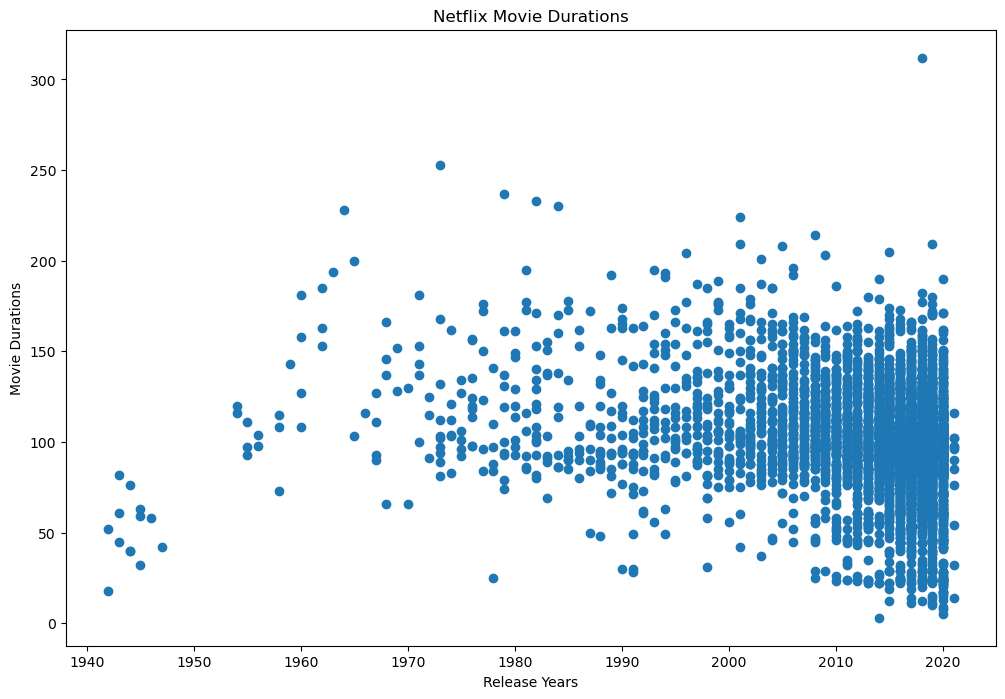

In [7]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
movie_release_year = movie_only.loc[:, ["release_year"]]
movie_duration = movie_only.loc[:, ["duration"]]
plt.scatter(movie_release_year, movie_duration)

# Create a title
xtitle = "Release Years"
ytitle = "Movie Durations"
maintitle = "Netflix Movie Durations"

plt.xlabel(xtitle)
plt.ylabel(ytitle)
plt.title(maintitle)

# Show the plot
plt.show()

## Dive Deeper

In [ ]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies["duration"] < 60
# Print the first 20 rows of short_movies
df_short_movies = netflix_movies[short_movies]
print(df_short_movies[0:20])

## Marking non-feature films

In [9]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies.iterrows() :
    if row['genre'] == "Documentaries":
        colors.append("red")
    elif row['genre'] == "Children":
        colors.append("blue")    
    elif row['genre'] == "Stand-Up":
        colors.append ("green")
    else:
        colors.append("black")
        
# Inspect the first 10 values in your list        
print(netflix_movies[0:10])

    title        country          genre  release_year  duration
1    7:19         Mexico         Dramas          2016        93
2   23:59      Singapore  Horror Movies          2011        78
3       9  United States         Action          2009        80
4      21  United States         Dramas          2008       123
6     122          Egypt  Horror Movies          2019        95
7     187  United States         Dramas          1997       119
8     706          India  Horror Movies          2019       118
9    1920          India  Horror Movies          2008       143
10   1922  United States         Dramas          2017       103
13  2,215       Thailand  Documentaries          2018        89


## Plotting with color

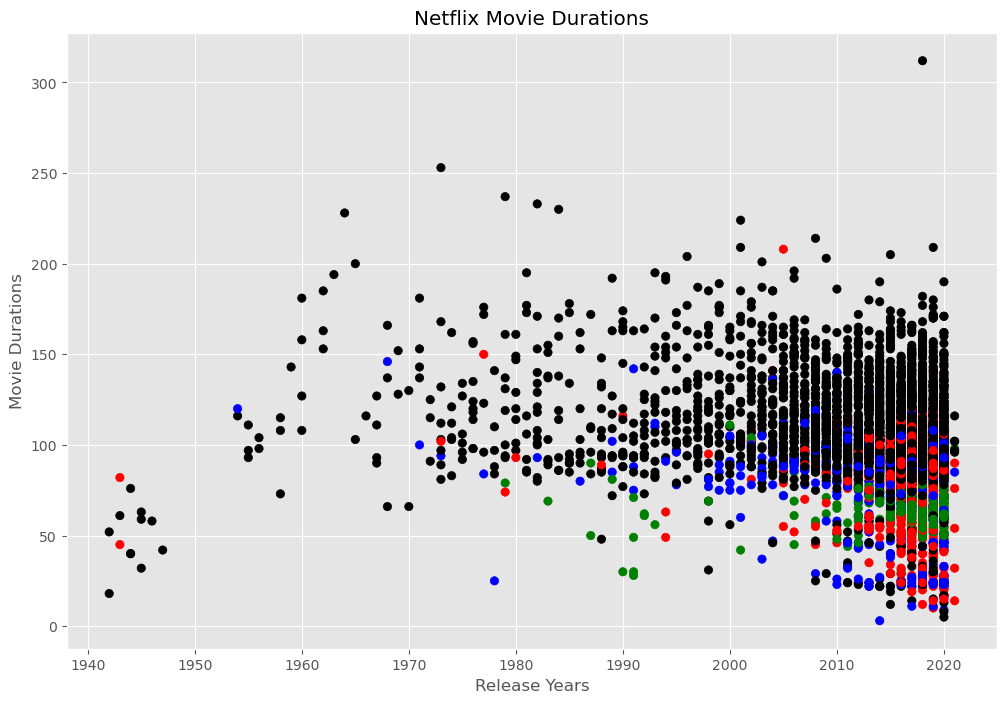

In [10]:
# Set the figure style and initalize a new figure
plt.style.use('ggplot')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
movie_release_year = movie_only.loc[:, ["release_year"]]
movie_duration = movie_only.loc[:, ["duration"]]
plt.scatter(movie_release_year, movie_duration, color = colors)

# Create a title and axis labels
xtitle = "Release Years"
ytitle = "Movie Durations"
maintitle = "Netflix Movie Durations"

plt.xlabel(xtitle)
plt.ylabel(ytitle)
plt.title(maintitle)

# Show the plot
plt.show()

## Conclusion

At last, I’ve completed the Exploratory Data Analysis (EDA). As anticipated, genres that are less common, such as children’s movies and documentaries, tend to group around the lower section of the plot. This implies that these genres might play a role in the observed decline in Netflix movie durations from 2000 to 2020. However, drawing firm conclusions requires additional analysis.

## EDA Summary

There’s a potential influence of movie genres on the observed Netflix movie duration decrease trend from 2000 to 2020. To make conclusive statements, further analysis is necessary.